In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import json
import gmaps
import gmaps.datasets
#gmaps.configure(api_key = )
from pandas.io.json import json_normalize
import os.path
import scipy.stats as stats
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


WRANGLING

LOAD ALL FILES INTO INDIVIDUAL DATA FRAMES AND LOOK FOR COMMONALITIES

In [15]:
#os.path.join
clean_dir = '/home/skultra/Springboard/Code/Capstone-1/Drone_Data/Clean_CSV'

In [16]:
us_yemen_path = os.path.join(clean_dir, 'US_Yemen_updated.csv')
cia_pakistan_path = os.path.join(clean_dir, 'CIA_Pakistan_updated.csv')
us_somalia_path = os.path.join(clean_dir, 'US_Somalia_updated.csv')
us_afghanistan_path = os.path.join(clean_dir, 'US_Afghanistan_Data.csv')

In [17]:
#CIA_Pakistan_clean_data
pakistan = pd.read_csv(cia_pakistan_path)
#US_Somalia_clean_data 
somalia = pd.read_csv(us_somalia_path)
#US_Yemen_clean_data 
yemen = _data = pd.read_csv(us_yemen_path)
#US_Afghanistan_clean_data 
afghanistan = pd.read_csv(us_afghanistan_path)

In [18]:
frames = [afghanistan, yemen, somalia, pakistan]
frames_dict= {}
frames_dict['Afghanistan'] = afghanistan
frames_dict['Pakistan'] = pakistan
frames_dict['Somalia'] = somalia
frames_dict['Yemen'] = yemen


master_frame = pd.concat(frames)
for frame in frames:
    print(frame.shape)

(442, 26)
(299, 21)
(86, 20)
(430, 15)


In [19]:
#MasterFrame.columns
#MasterFrame.shape
master_frame.info()
master_frame.convert_objects(convert_numeric=True).dtypes 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 429
Data columns (total 30 columns):
Air strike?                                                   385 non-null float64
Area                                                          430 non-null object
Counter-
terrorism, force protection or strategic effects?    442 non-null object
Date                                                          1257 non-null object
Drone strike                                                  827 non-null float64
Index                                                         1257 non-null int64
Location                                                      1256 non-null object
Maximum children killed                                       1257 non-null int64
Maximum civilians killed                                      1257 non-null int64
Maximum number of strikes                                     299 non-null float64
Maximum people injured                                        1257 no

/home/skultra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


Air strike?                                                    float64
Area                                                            object
Counter-\nterrorism, force protection or strategic effects?     object
Date                                                            object
Drone strike                                                   float64
Index                                                            int64
Location                                                        object
Maximum children killed                                          int64
Maximum civilians killed                                         int64
Maximum number of strikes                                      float64
Maximum people injured                                           int64
Maximum people killed                                            int64
Maximum strikes                                                float64
Minimum children killed                                          int64
Minimu

LOAD JSON FILE CREATED FROM CIA TWITTER FEED

In [20]:
#with keyword automatically closes file at the end
with open('/home/skultra/Springboard/Code/Capstone-1/Drone_Data/Drone_Data.json') as f:
    twitter_drone = json.load(f)
twitter_drone.keys()
    
#JSON_DF_stats['status'] = pd.DataFrame(twitter_drone)
JSON_DF_stats = pd.DataFrame(twitter_drone['strike'])
# remove all the columns, that are not common
# combine all the data frames into one
# look at pandas documentation, combine things into one big data frame
# do same for both sets of data, get 2 clean dataframes, 

In [21]:
#twitter_drone_data_strike = pd.DataFrame(twitter_drone['strike'])
JSON_DF_stats.info()
#len(JSON_DF_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 22 columns):
_id                  647 non-null object
articles             647 non-null object
bij_link             647 non-null object
bij_summary_short    647 non-null object
bureau_id            647 non-null object
children             647 non-null object
civilians            647 non-null object
country              647 non-null object
date                 647 non-null object
deaths               647 non-null object
deaths_max           647 non-null object
deaths_min           647 non-null object
injuries             647 non-null object
lat                  647 non-null object
location             647 non-null object
lon                  647 non-null object
names                647 non-null object
narrative            647 non-null object
number               647 non-null int64
target               647 non-null object
town                 647 non-null object
tweet_id             647 non-null o

VISUALIZATION

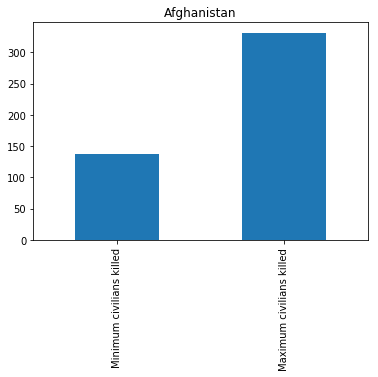

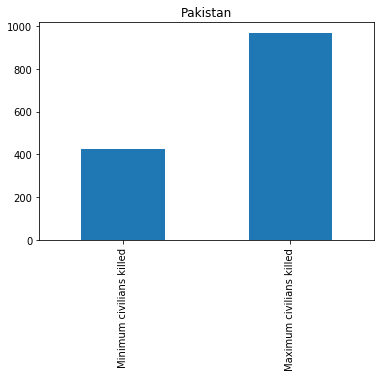

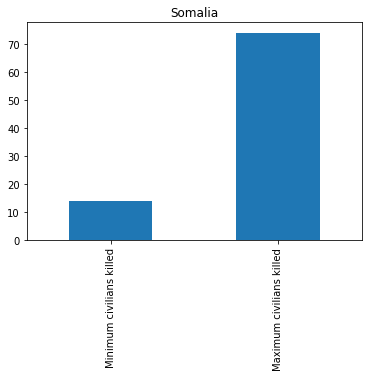

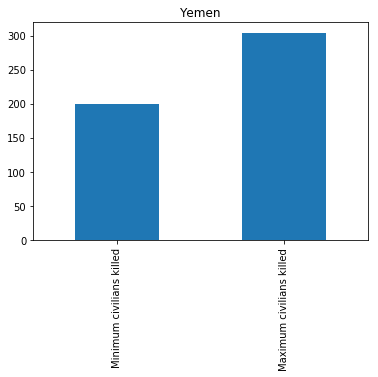

In [22]:
#Count something interesting
# of civilian deaths per AO
# Somalia has the greatest fluctuation between known civlian deaths and unknown civilian deaths
for key,value in frames_dict.items():
    cols = ['Minimum civilians killed', 'Maximum civilians killed']    
    value[cols].sum().plot.bar(title=key)
    plt.show()

#set the dictionary key as name of 
#for key, value in dictionary.items:
    

Investigating the trend of drone related deaths over time using a line graph. 
    

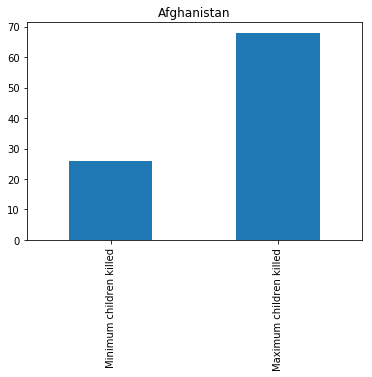

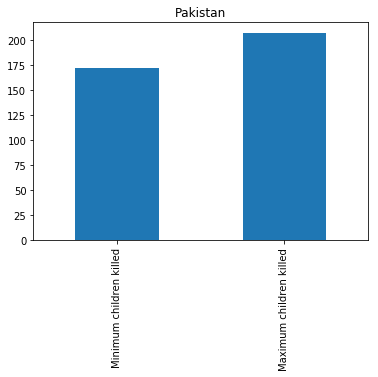

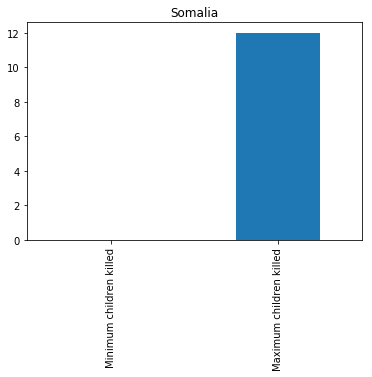

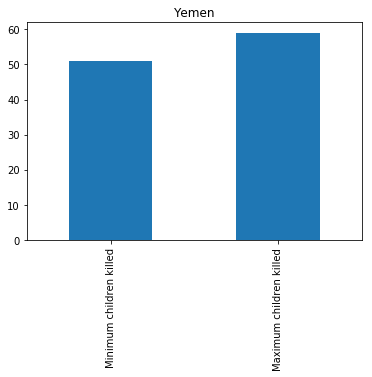

In [23]:
#subset out and take each seperately, 
for key,value in frames_dict.items():
    cols = ['Minimum children killed', 'Maximum children killed']    
    value[cols].sum().plot.bar(title=key)
    plt.show()

Least number of children killed in Somalia, most number in Yemen. 

Immediate goals: do heatmap visualization, children killed, count based columns, heatmap, clustering, some count based columns(bar chart or pie char)
statistiscal 
after: basic writeups nad documentation
    
NLP featurization-preprocessing test, clean text data
basic supervised ML for classification: random forest, svm, logistic regressions, boosting, bagging vs. boosting
measuring accuracy, precision, recall, f1 score
        

INFERENTIAL STATISTICS

In [24]:
def paired_difference_test(frame1, frame2):
    df1_population = []
    df2_population = []
#get the mean difference
    df1_population = .5 * (frame1['Maximum civilians killed'] -frame1['Minimum civilians killed'])
    df2_population = .5 * (frame2['Maximum civilians killed'] - frame2['Minimum civilians killed'])
    meand = df1_population.mean() - df2_population.mean()
    
#get std deviation of each group    
    df1_population_std = df1_population.std()
    df2_population_std = df2_population.std()
    
#get size of each group    
    df1_population_ratio_size = len(df1_population)
    df2_population_ratio_size = len(df2_population)
    
#get standard error
    SE = math.sqrt(((df2_population_std*df2_population_std)/df1_population_ratio_size)+
                   ((df1_population_std*df1_population_std)/df2_population_ratio_size))   
#z-score
    z_score = meand/SE
    
    
#calculate p-value
    p_value = stats.norm.sf(abs(z_score))
    
    print("Standard Error:", SE)
    print("z_score", z_score)
    print("p_value", p_value)
    

    
    
    
    '''meanD = df100_ratio_mean - df1000_ratio_mean 
    # Get the standard deviation of each group () df100_ratio_std = df100['Excess Readmission Ratio'].std()
    df1000_ratio_std = df1000['Excess Readmission Ratio'].std() 
    # Get the size of each group (n) df100_ratio_size = len(df100) df1000_ratio_size = len(df1000) 
    # Calculate Standard Error (SE) 
    SE = math.sqrt(((df100_ratio_std*df100_ratio_std)/df100_ratio_size)+
    ((df1000_ratio_std*df1000_ratio_std)/df1000_ratio_size) )
    # Calculate Z-Score z_score = meanD / SE z_score'''

In [25]:
print("Afghanistan:Yemen")
paired_difference_test(afghanistan, yemen)

print("\nAfghanistan:Somalia")
paired_difference_test(afghanistan, somalia)

print("\nAfghanistan:Pakistan")
paired_difference_test(afghanistan, pakistan)

print("\nYemen:Somalia")
paired_difference_test(yemen, somalia)

print("\nYemen:Pakistan")
paired_difference_test(yemen, pakistan)

print("\nSomalia:Pakistan")
paired_difference_test(somalia, pakistan)


Afghanistan:Yemen
Standard Error: 0.10054440569449044
z_score 0.43634182320427434
p_value 0.331294370858

Afghanistan:Somalia
Standard Error: 0.1871807508145979
z_score -0.6912045985744322
p_value 0.244718487206

Afghanistan:Pakistan
Standard Error: 0.11288259126005473
z_score -3.6698654064693788
p_value 0.000121339105775

Yemen:Somalia
Standard Error: 0.1311606424123993
z_score -1.3209139711030473
p_value 0.0932650253823

Yemen:Pakistan
Standard Error: 0.10917268276636354
z_score -4.196431143238104
p_value 1.35576923961e-05

Somalia:Pakistan
Standard Error: 0.20328480387672884
z_score -1.4014019518300296
p_value 0.0805469544725


In [30]:
master_frame_updated.head(5)

,Maximum civilians killed,Maximum number of strikes,Maximum people injured,Maximum people killed,Maximum strikes,Minimum children killed,Minimum civilians killed,Minimum number of strikes,Minimum people injured
0,0,0.0,0,0,1.0,0,0,0.0,0
1,0,0.0,0,18,1.0,0,0,0.0,0
2,0,0.0,0,7,1.0,0,0,0.0,0
3,0,0.0,0,0,1.0,0,0,0.0,0
4,0,0.0,0,3,1.0,0,0,0.0,0


PCA & KMeans

In [32]:
scaler = StandardScaler()

pca = PCA(n_components = 2)
master_frame_updated = master_frame[master_frame.columns[8:17]]

#master_frame_updated = master_frame_updated.drop('Unnamed: 0', 1, inplace=True)
#master_frame_updated.convert_objects(convert_numeric=True).dtypes 
#print(master_frame_updated.head(3))
master_frame_updated = master_frame_updated.fillna(0)
scaled_frame = scaler.fit_transform(master_frame_updated)

pca_features = pca.fit_transform(scaled_frame)
print(pca_features)

# Assign 0th column of pca_features: xs
#xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
#ys = pca_features[:,1]

# Scatter plot xs vs ys
#plt.scatter(xs, ys)
#plt.axis('equal')
#plt.show()

# Create scaler: scaler
#scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_frame)


# Create pipeline: pipeline
#pipeline = make_pipeline(scaler,kmeans)

#pipeline.fit()


[[-0.74045084 -0.37146051]
 [-0.2888273  -0.39661829]
 [-0.56481946 -0.38124409]
 ..., 
 [-0.4711766  -0.39465997]
 [-0.44516783 -0.39576421]
 [-0.66430209 -0.37393155]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
clusters = kmeans.labels_

In [1]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4))
fig.suptitle('Visualizing drone strike clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
#ax2.set_title('Clustered Labels')
y = clusters
bc_pca = pca_features
for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
    if y[i] == 2:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='b', marker='.')
        

NameError: name 'plt' is not defined

In [3]:
import os
import os.path as op
from time import time
import dask.dataframe as ddf
import dask.array as da
from distributed import Client


def make_categorical_data(n_samples=int(1e7), n_features=10):
    """Generate some random categorical data
    The default parameters should generate around 1GB of random integer data
    with increasing cardinality along with a normally distributed real valued
    target variable.
    """
    feature_names = ['f_%03d' % i for i in range(n_features)]
    features_series = [
        da.random.randint(low=0, high=(i + 1) * 10, size=n_samples,
                          chunks=n_samples // 10)
        for i in range(n_features)
    ]
    features_series = [
        ddf.from_dask_array(col_data, columns=[feature_name])
        for col_data, feature_name in zip(features_series, feature_names)
    ]
    target = da.random.normal(loc=0, scale=1, size=n_samples,
                              chunks=n_samples // 10)
    target = ddf.from_dask_array(target, columns=['target'])